In [8]:
import zipfile
with zipfile.ZipFile('/home/hso6b/DL/dl_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/hso6b/dl_data')

In [1]:
import numpy as np
import sys
import pandas as pd 
from keras.layers import Input, Lambda, Dense, Flatten , Dropout , MaxPool2D
from keras.models import Model , Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt
import random
import os
from distutils.file_util import copy_file
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau

In [2]:
covidDataPath='dl_data_2/dl_data/Covid_img'
pneumoniaDataPath='dl_data_2/dl_data/Viral_img'
normalDataPath='dl_data_2/dl_data/Normal_img'

In [3]:
# Lists for access paths
listCovidPaths = []
listViralPaths=[]
listNormalPaths = []

# Get covid images files paths
for root, directories, files in os.walk(covidDataPath):
    for name in files:
        listCovidPaths.append(os.path.join(root, name))

for root, directories, files in os.walk(pneumoniaDataPath):
    for name in files:
        listViralPaths.append(os.path.join(root, name))        
        
# Get normal images files paths
for root, directories, files in os.walk(normalDataPath):
    for name in files:
        listNormalPaths.append(os.path.join(root, name))

# Shuffle lists for random train / test

random.shuffle(listCovidPaths)
random.shuffle(listNormalPaths)
random.shuffle(listViralPaths)

In [28]:
# main folder
!mkdir ./dl_data_2/dl_data/Data/

# Train data folders
!mkdir ./dl_data_2/dl_data/Data/Train/
!mkdir ./dl_data_2/dl_data/Data/Train/Covid/
!mkdir ./dl_data_2/dl_data/Data/Train/Normal/
!mkdir ./dl_data_2/dl_data/Data/Train/Viral/

# Test data folders
!mkdir ./dl_data_2/dl_data/Data/Test/
!mkdir ./dl_data_2/dl_data/Data/Test/Covid/
!mkdir ./dl_data_2/dl_data/Data/Test/Normal/
!mkdir ./dl_data_2/dl_data/Data/Test/Viral/

# Valid data folders
!mkdir ./dl_data_2/dl_data/Data/Valid/
!mkdir ./dl_data_2/dl_data/Data/Valid/Covid/
!mkdir ./dl_data_2/dl_data/Data/Valid/Normal/
!mkdir ./dl_data_2/dl_data/Data/Valid/Viral/

In [4]:
# Paths to covid images folders
pathCovidTrain = './dl_data_2/dl_data/Data/Train/Covid/'
pathCovidTest = './dl_data_2/dl_data/Data/Test/Covid/'
pathCovidValid='./dl_data_2/dl_data/Data/Valid/Covid/'


# Paths to normal images folders
pathNormalTrain = './dl_data_2/dl_data/Data/Train/Normal/'
pathNormalTest = './dl_data_2/dl_data/Data/Test/Normal/'
pathNormalValid='./dl_data_2/dl_data/Data/Valid/Normal/'

# Paths to viral image foldrs
pathViralTrain = './dl_data_2/dl_data/Data/Train/Viral/'
pathViralTest = './dl_data_2/dl_data/Data/Test/Viral/'
pathViralValid='./dl_data_2/dl_data/Data/Valid/Viral/'

In [5]:
len(listCovidPaths)

3610

In [6]:
len(listNormalPaths)

10192

In [7]:
len(listViralPaths)

1345

In [5]:
# Move covid images files to new folders
for i in range(3610):
    if i < 2893:
        copy_file(listCovidPaths[i], pathCovidTrain)
    elif i>=2893 and i<=3255:
        copy_file(listCovidPaths[i], pathCovidValid)
    else  : 
        copy_file(listCovidPaths[i], pathCovidTest)
        
for i in range(10192):
    if i < 8154:
        copy_file(listNormalPaths[i], pathNormalTrain)
    elif i>=8154 and i<=9174:
        copy_file(listNormalPaths[i], pathNormalValid)     
    else  : 
        copy_file(listNormalPaths[i], pathNormalTest)       
                
for i in range(1345):
    if i < 402:
        copy_file(listViralPaths[i], pathViralTrain)
    elif i>=402 and i<=552:
        copy_file(listViralPaths[i], pathViralValid)     
    else  : 
        copy_file(listViralPaths[i], pathViralTest)     

# Start Here

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255 ,
                                    zoom_range=0.3, 
                                    horizontal_flip=True, 
                                    shear_range=0.2,
                                    rotation_range=30
                                    )

train = train_data_gen.flow_from_directory(directory='dl_data_2/dl_data/Data/Train',
                                           class_mode ='binary',
                                           batch_size=64,
                                           target_size=(224,224))  

Found 14799 images belonging to 3 classes.


In [14]:
test_data_gen = ImageDataGenerator(rescale=1./255 )

test = test_data_gen.flow_from_directory(directory='dl_data_2/dl_data/Data/Test', 
                                         target_size=(224,224), 
                                         class_mode='binary',
                                         shuffle=False,
                                         batch_size=64)

valid = test_data_gen.flow_from_directory(directory='dl_data_2/dl_data/Data/Valid', 
                                          target_size=(224,224), 
                                          class_mode = 'binary',
                                          shuffle=False,
                                          batch_size=64)

Found 6248 images belonging to 3 classes.
Found 5541 images belonging to 3 classes.


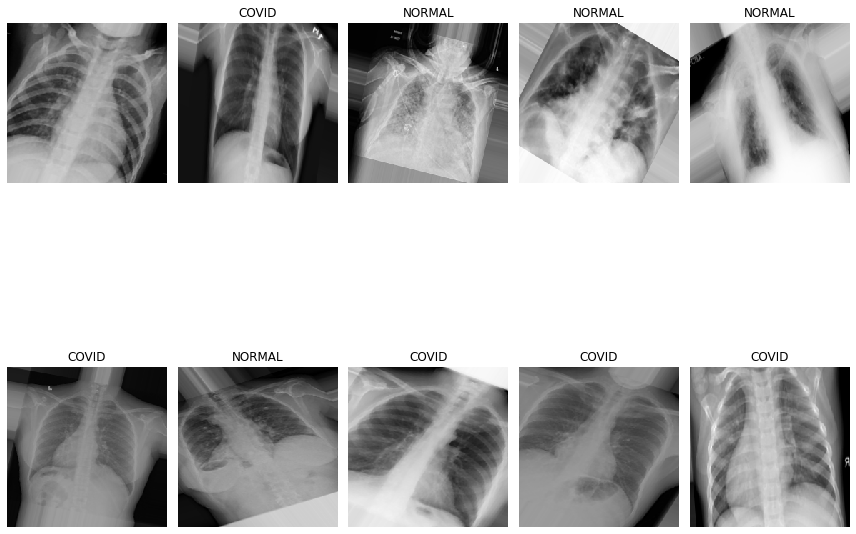

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'COVID'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

# Resnet

In [8]:
from tensorflow import keras

inc = keras.applications.resnet50.ResNet50(include_top = False,
                                           weights = 'imagenet',
                                           input_shape = (224,224,3),
                                           classifier_activation = 'sigmoid')

2022-04-10 23:46:42.981446: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 23:46:44.917321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10779 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0000:05:00.0, compute capability: 3.7


In [16]:
for layer in inc.layers:           
  layer.trainable = False

#Definition of the Keras model outputs

x = Flatten()(inc.output)
prediction= Dense(units=1, activation='sigmoid')(x)

model = Model(inc.input,prediction)


#Compile model

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [17]:
early = EarlyStopping(monitor="val_accuracy", mode='min', patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=1, factor=0.3, min_lr=0.0001)
callbacks_list = [early, learning_rate_reduction]

In [18]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight="balanced",
                               classes=np.unique(train.classes), 
                               y=train.classes)
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.3664819944598339, 1: 0.48491103902486976, 2: 4.855314960629921}


In [ ]:
hist = model.fit(train, 
                 steps_per_epoch=len(train)*0.75, 
                 epochs=5,
                 validation_data=valid, 
                 class_weight=cw,
                 validation_steps=len(test)*0.75,
                 callbacks=callbacks_list
                )

Epoch 1/5
174/174 [==============================] - 166s 937ms/step - loss: 32973.2617 - accuracy: 0.6859 - val_loss: 541799.8750 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 2/5
174/174 [==============================] - 163s 934ms/step - loss: 18632.5566 - accuracy: 0.6810 - val_loss: 532594.6250 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 3/5
174/174 [==============================] - ETA: 0s - loss: -58746.3828 - accuracy: 0.6679
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
174/174 [==============================] - 161s 925ms/step - loss: -58746.3828 - accuracy: 0.6679 - val_loss: 1374088.2500 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 4/5
174/174 [==============================] - 162s 927ms/step - loss: -89348.2109 - accuracy: 0.6890 - val_loss: 1611302.6250 - val_accuracy: 0.6814 - lr: 3.0000e-04
Epoch 5/5
106/174 [=================>............] - ETA: 51s - loss: -41635.8086 - accuracy: 0.6814